In [1]:
from copy import deepcopy
import numpy as np
from numpy.linalg import norm
import scipy.ndimage as ndi
from aquapointer.analog.utils import detuning_scale_utils as dsu
from aquapointer.density_canvas.DensityCanvas import DensityCanvas
from aquapointer.slicing import density_file_to_grid, density_slices_by_plane_and_offsets, density_slices_by_planes, density_origin, density_point_boundaries
import matplotlib.pyplot as plt

In [2]:
grid = density_file_to_grid("../data/3D-RISM_densities/1NNC/prot_3drism.O.1.dx")

In [3]:
print(density_origin(grid))
print(density_point_boundaries(grid))

[ 6.694 -3.659 41.76 ]
[46.694 36.341 81.76 ]


In [4]:
points = np.array([[0, 0, 10], [1, 0, 10], [0, 1, 10]]) + np.array([density_origin(grid)] * 3)
canvases = density_slices_by_plane_and_offsets(grid, points=points, offsets=[10, 20])

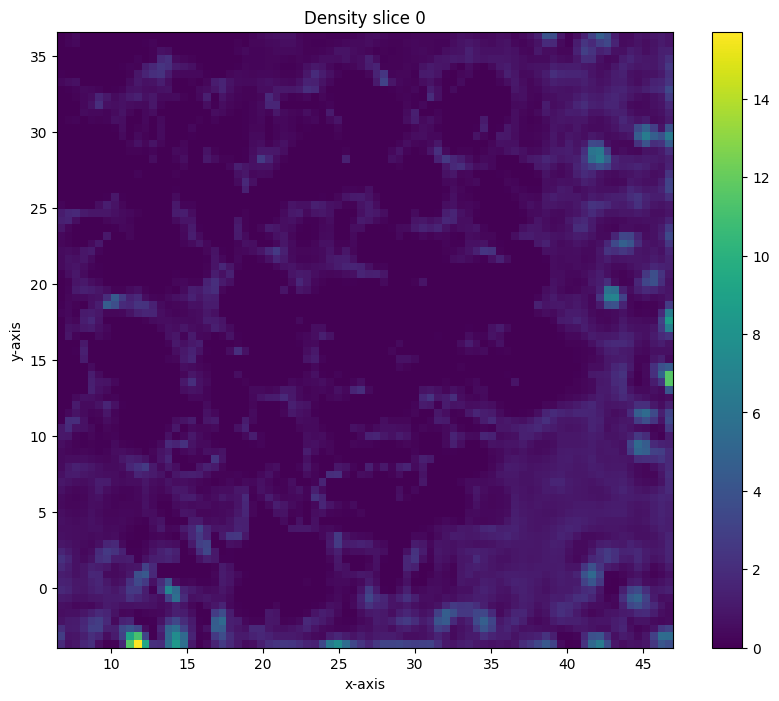

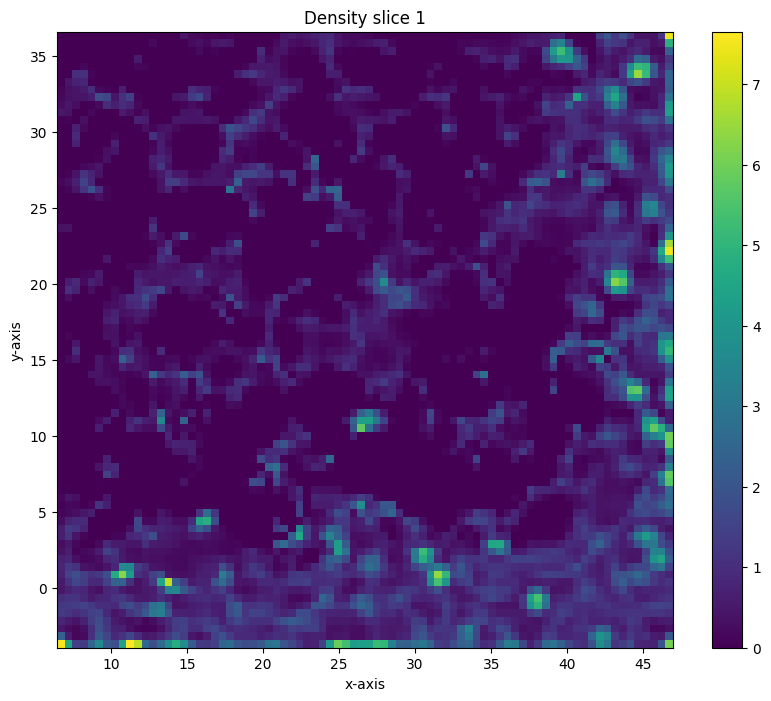

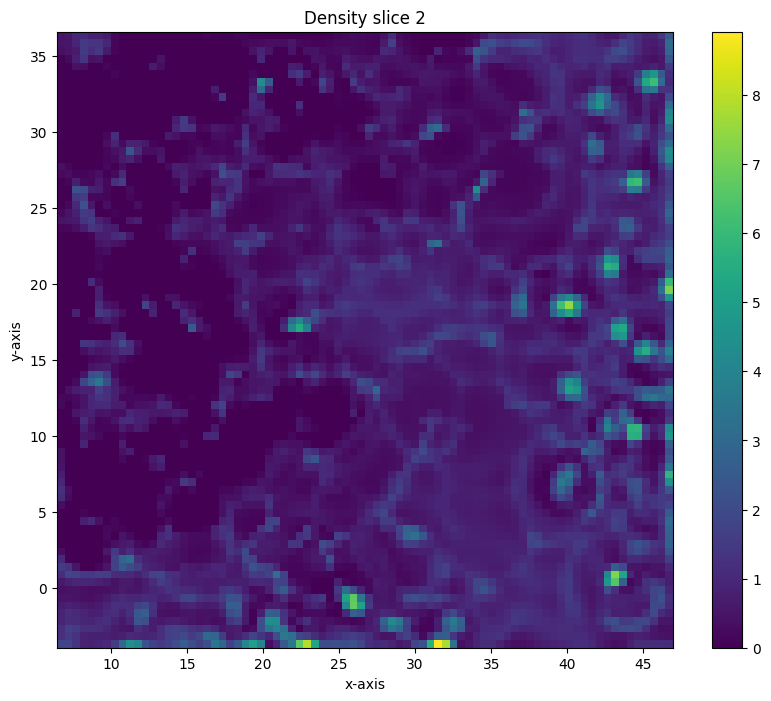

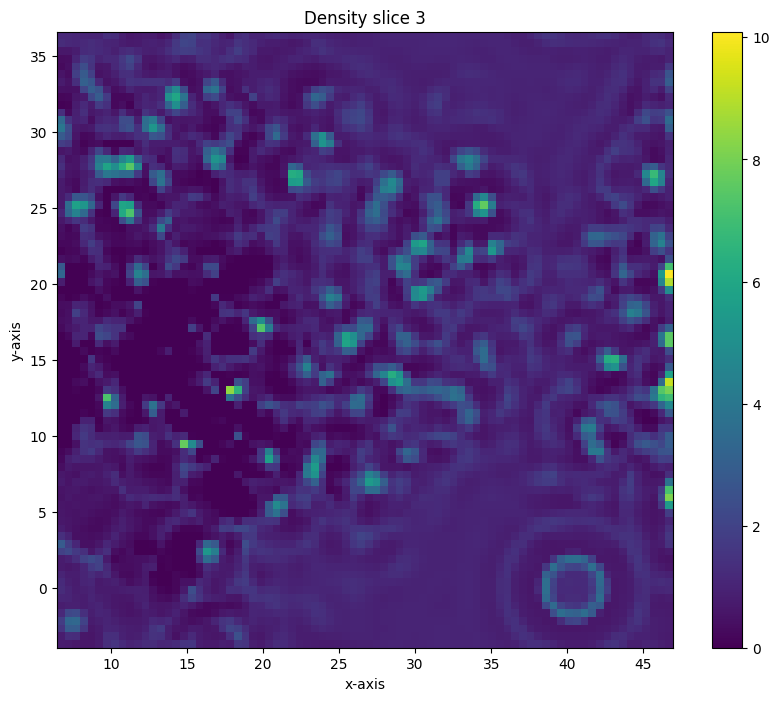

In [5]:
for c, canvas in enumerate(canvases):
    canvas.draw(title=f"Density slice {c}")

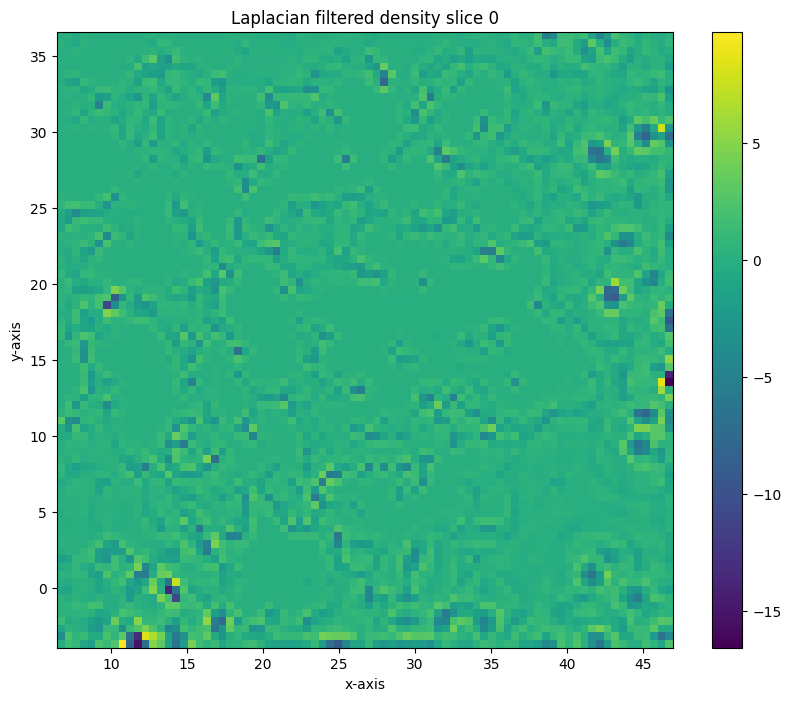

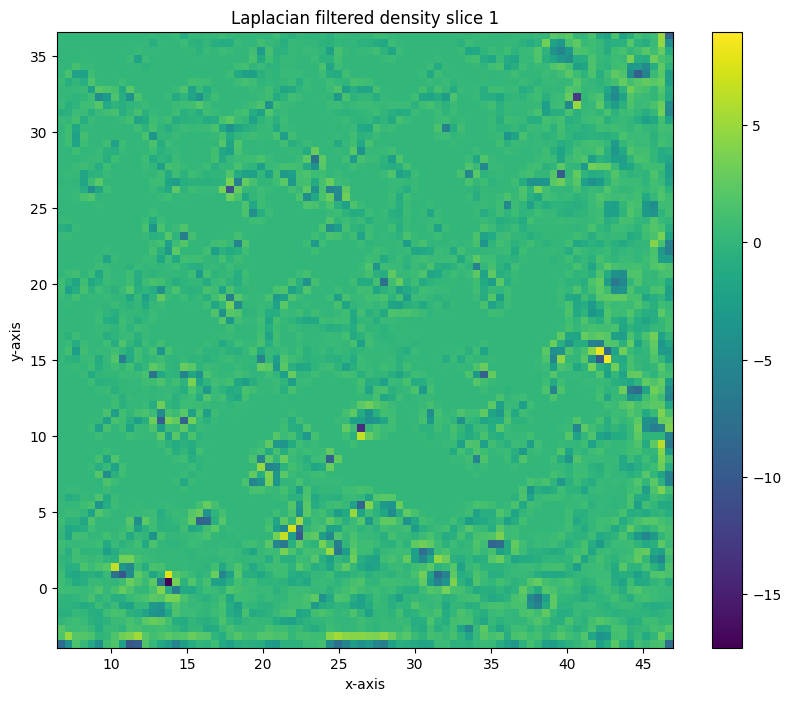

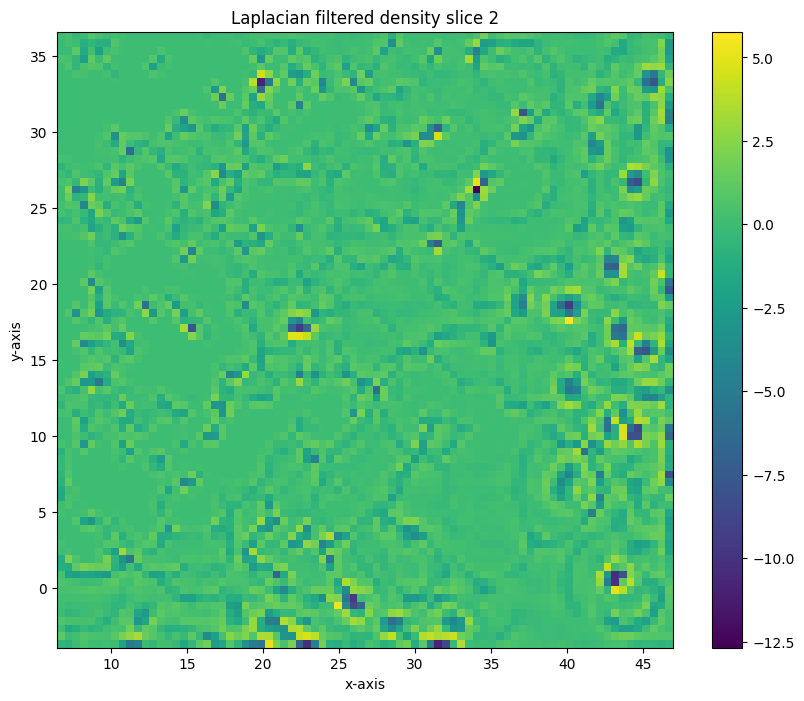

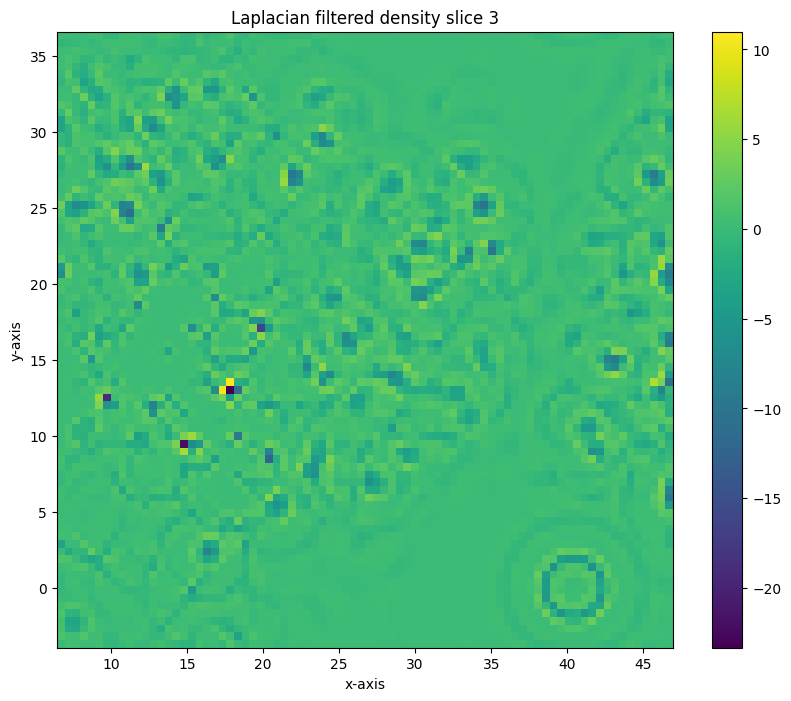

In [6]:
for c, canvas in enumerate(canvases):
    filtered = deepcopy(canvas)
    filtered.filter_density(filter_settings={"filter_function": ndi.laplace})
    filtered.draw(title=f"Laplacian filtered density slice {c}")

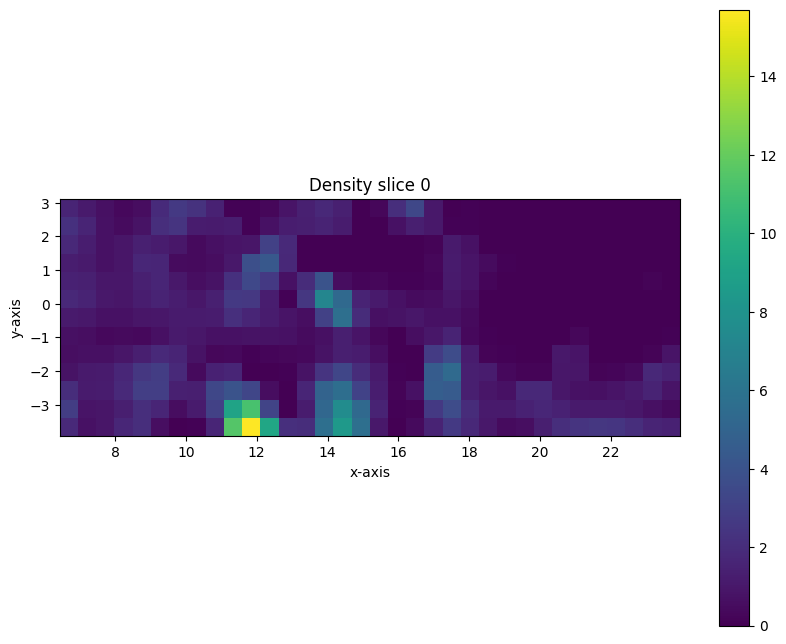

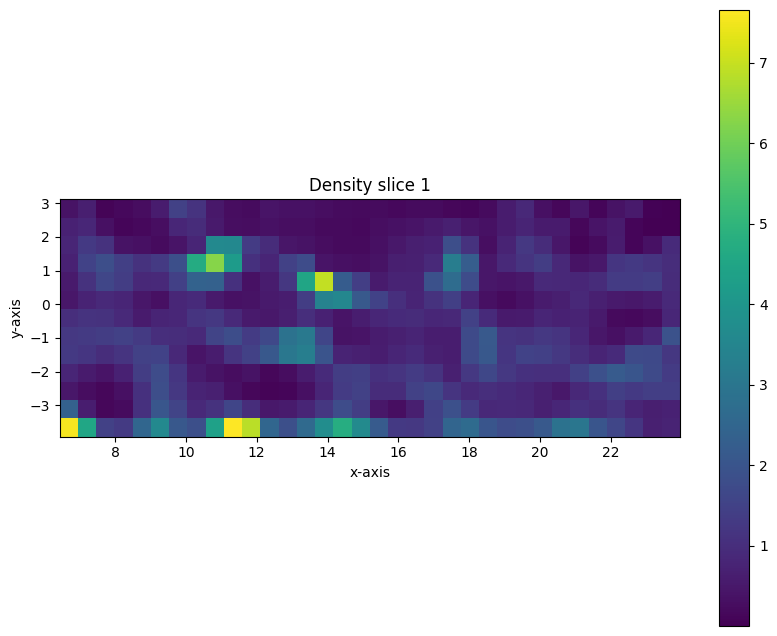

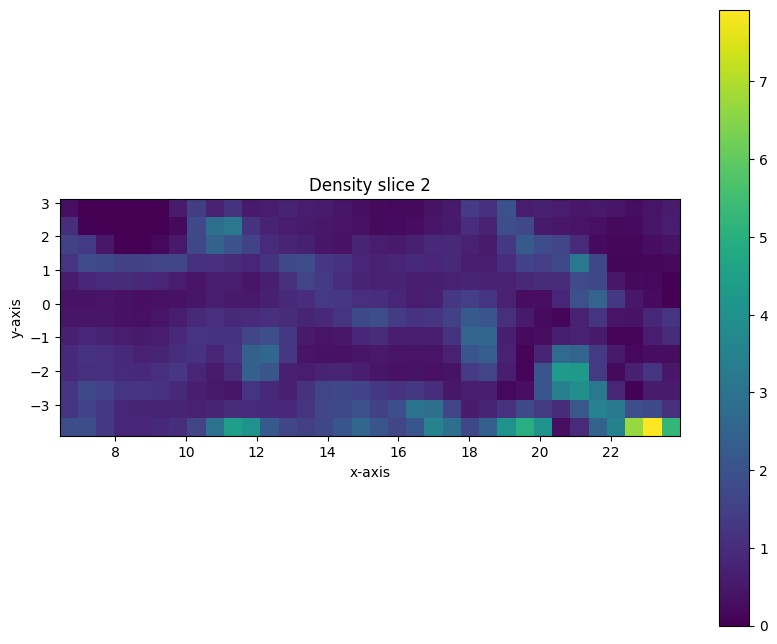

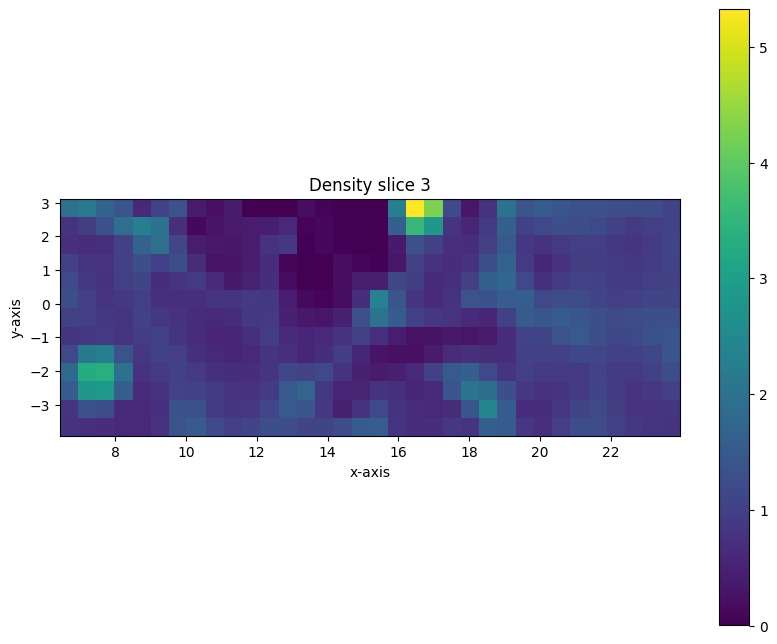

In [7]:
cropped_canvases = deepcopy(canvases)

for c, canvas in enumerate(canvases):
    cropped = deepcopy(canvas)
    cropped.crop_canvas((40, 40), (20, 20))
    cropped.draw(title=f"Density slice {c}")

In [8]:
og = density_origin(grid)
points_1nnc = [
            np.array([og + np.array([5, 10, 8]),  og + np.array([6, 10, 8]), og + np.array([5, 11, 7])]),             
            np.array([og + np.array([15, 16, 20]), og + np.array([16, 16, 20]), og + np.array([15, 17, 19])]), 
            np.array([og + np.array([25, 22, 32]), og + np.array([26, 22, 32]), og + np.array([25, 23, 31])])
            ]
canvases_1nnc = density_slices_by_planes(grid, points_1nnc)

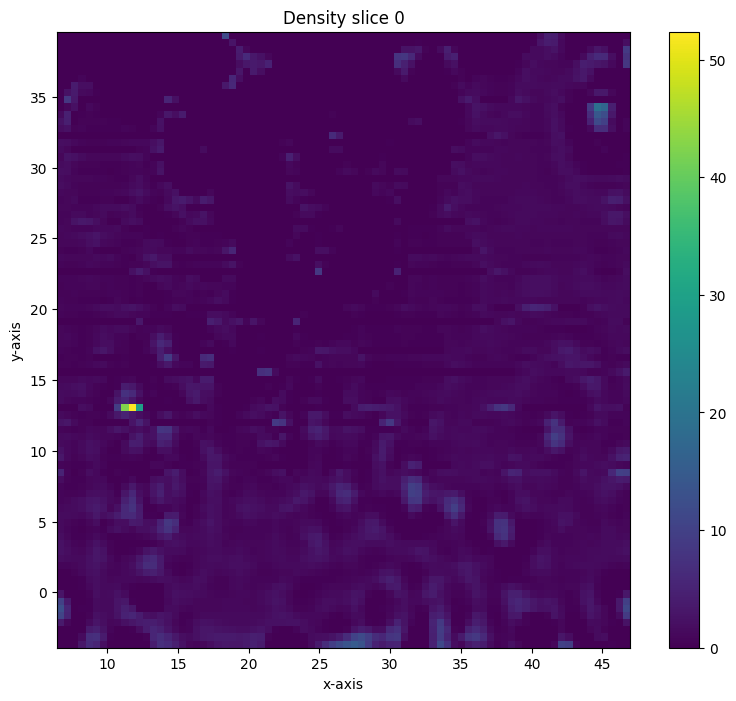

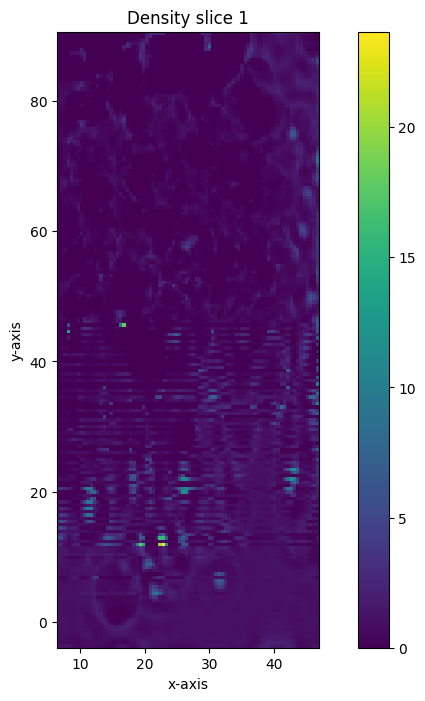

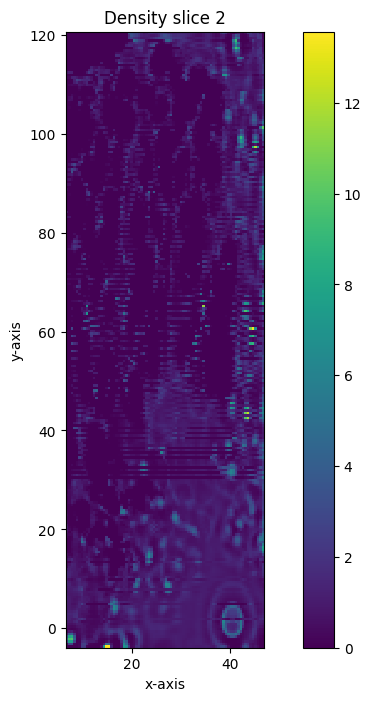

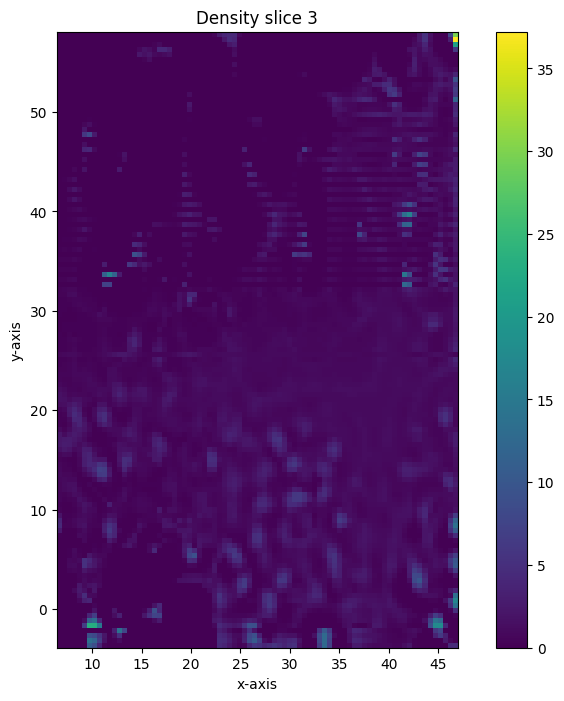

In [9]:
for c, canvas in enumerate(canvases_1nnc):
    canvas.draw(title=f"Density slice {c}")

In [10]:
canvases_1nnc[0].canvas_rotation

array([[ 0.85355339,  0.        , -0.        ],
       [ 0.        ,  0.70710678,  0.5       ],
       [ 0.        , -0.5       ,  0.70710678]])

In [11]:
grid_bd = density_file_to_grid("../data/3D-RISM_densities/bromoD/prot_3drism.O.1.dx")

In [12]:
print(density_origin(grid_bd))
print(density_point_boundaries(grid_bd))

[101.906 -26.182 -20.756]
[141.906  13.818  19.244]


In [13]:
points_bd = np.array([[0, 5, 0], [1, 5, 0], [0, 5, -1]]) + np.array([density_origin(grid_bd)] * 3)
canvases_bd = density_slices_by_plane_and_offsets(grid_bd, points=points_bd, offsets=np.linspace(5, 30, 6, dtype=int))

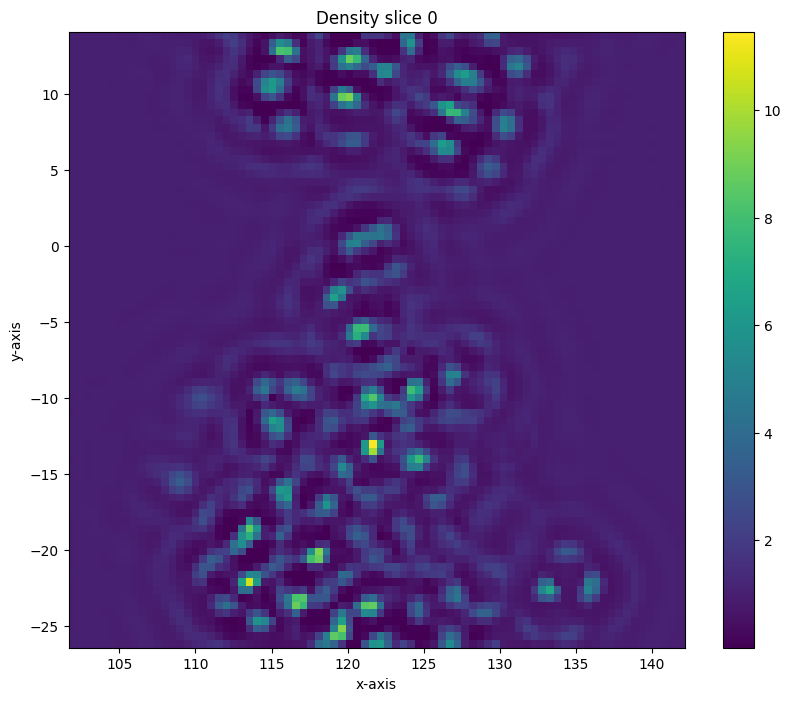

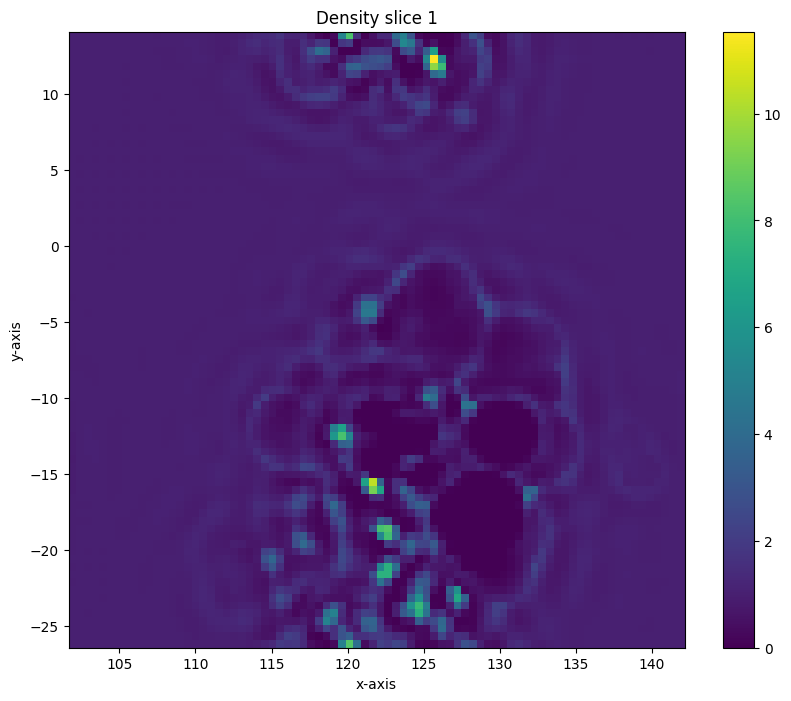

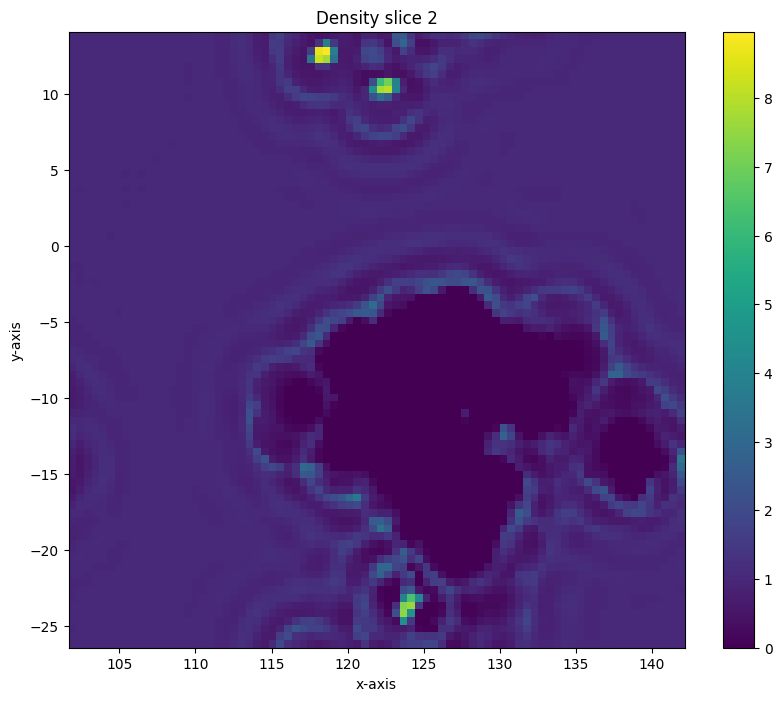

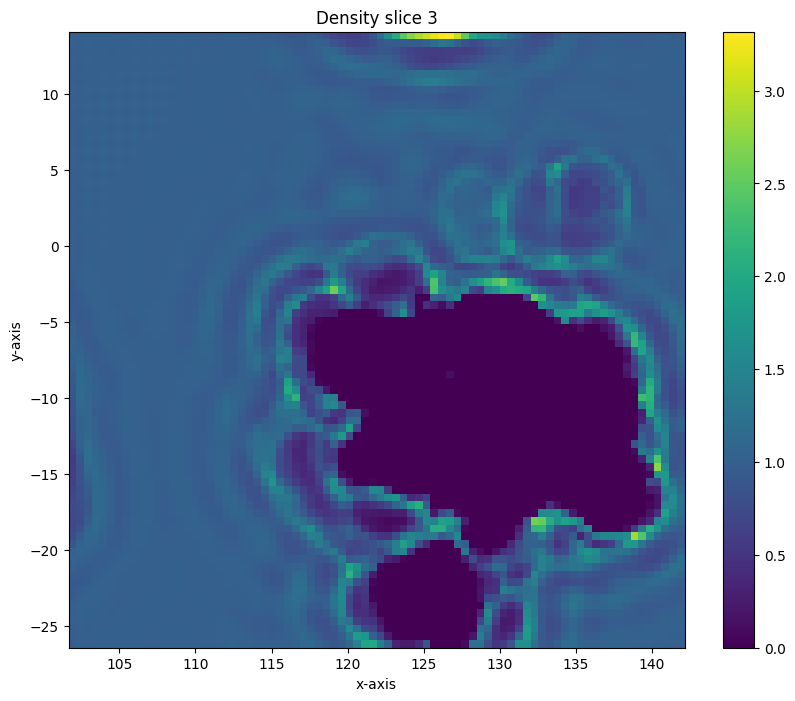

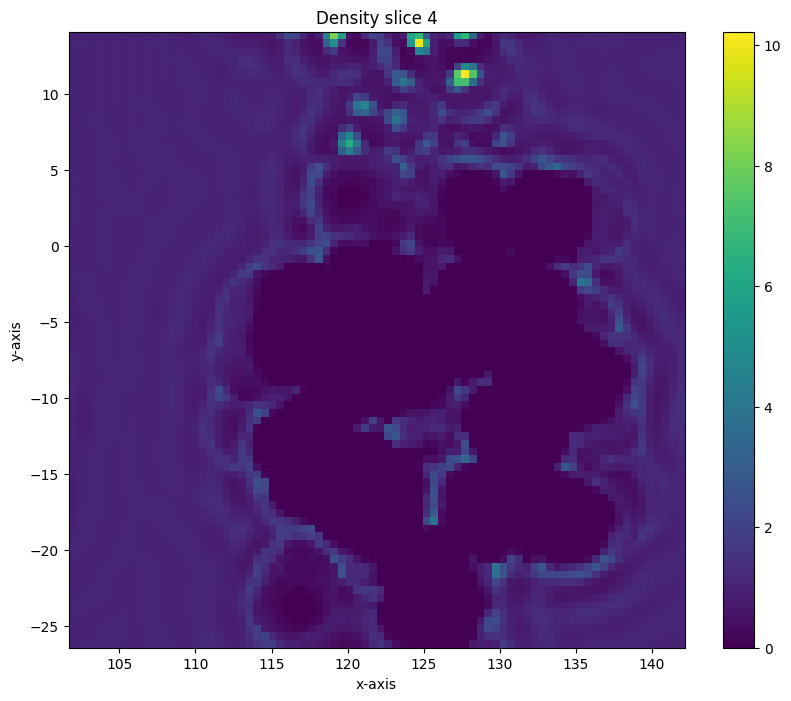

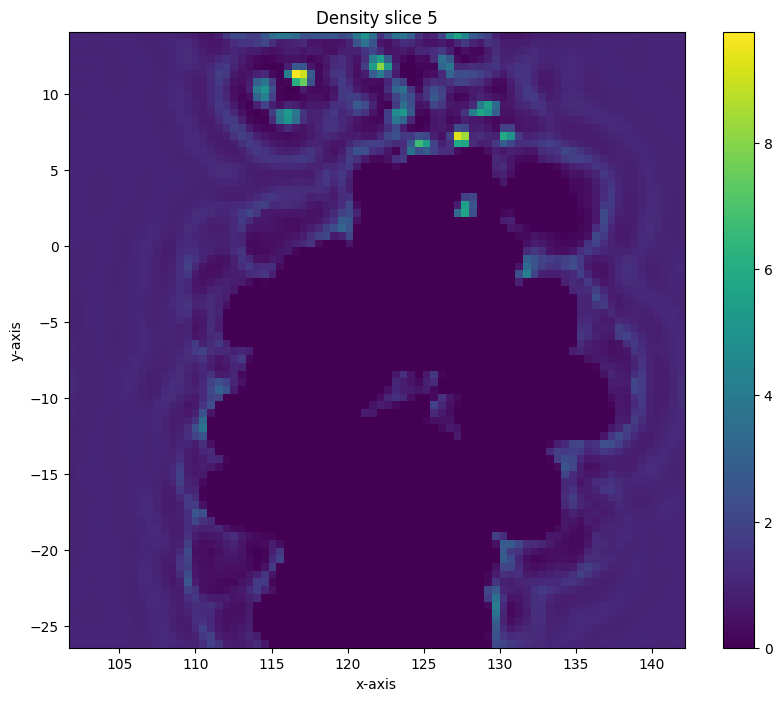

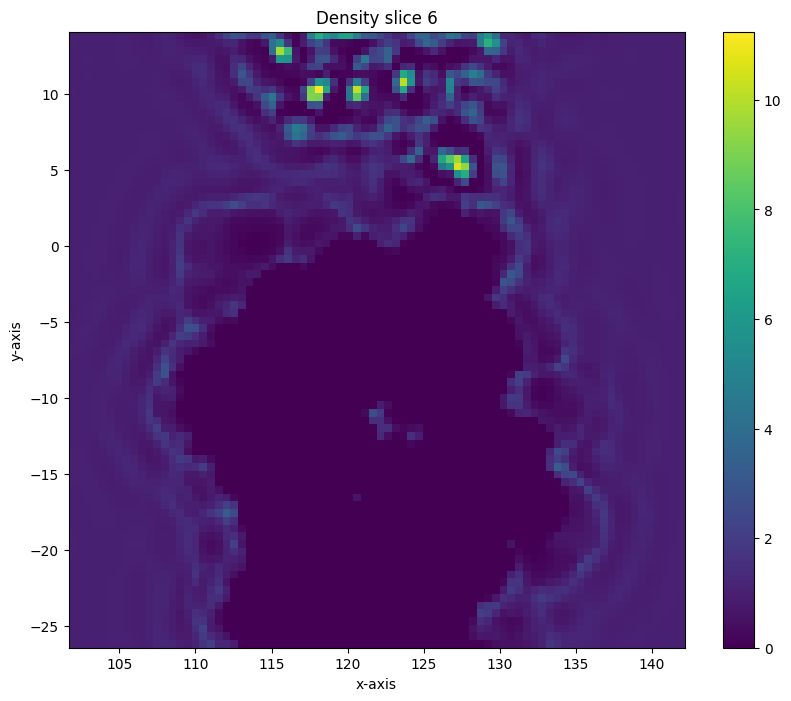

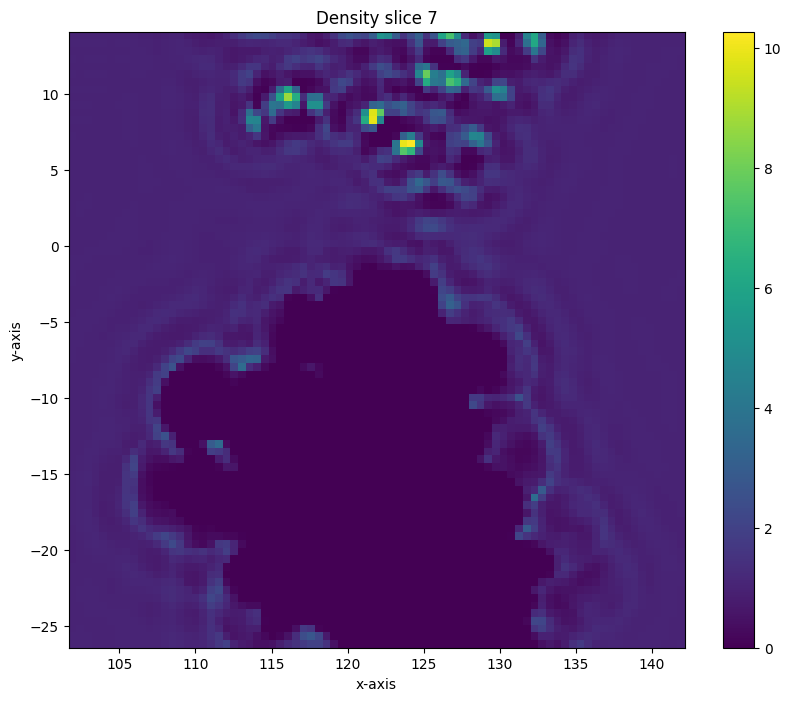

In [14]:
for c, canvas in enumerate(canvases_bd):
    canvas.draw(title=f"Density slice {c}")

In [15]:
grid_dh = density_file_to_grid("../data/3D-RISM_densities/dehydratase/prot_3drism.O.1.dx")

In [16]:
print(density_origin(grid_dh))
print(density_point_boundaries(grid_dh))

[ -9.293  -6.514 -10.821]
[30.707 33.486 29.179]


In [17]:
points_dh = np.array([[8, 0, 0], [8, 1, 0], [8, 0, 1]]) + np.array([density_origin(grid_dh)] * 3)
canvases_dh = density_slices_by_plane_and_offsets(grid_dh, points=points_dh, offsets=np.linspace(8, 28, 3, dtype=int))

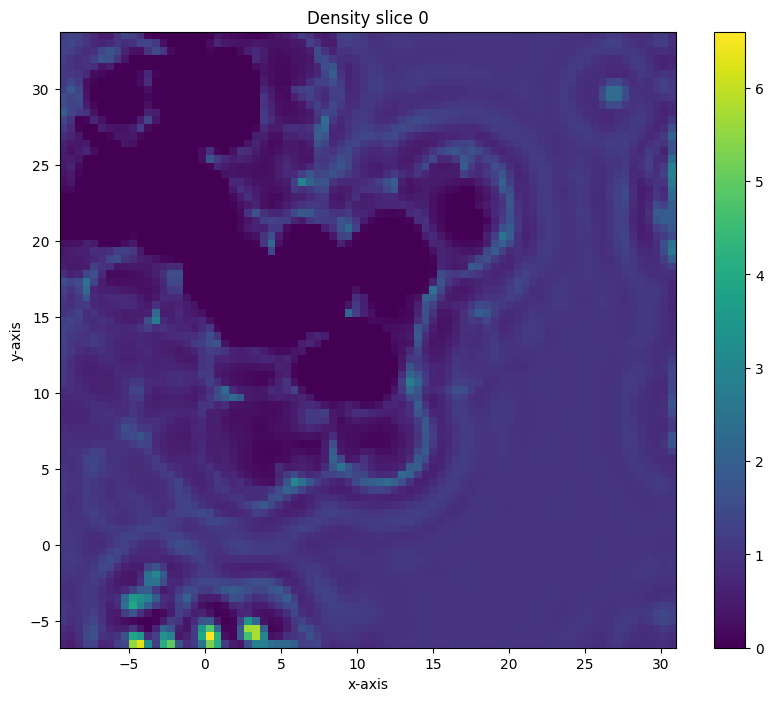

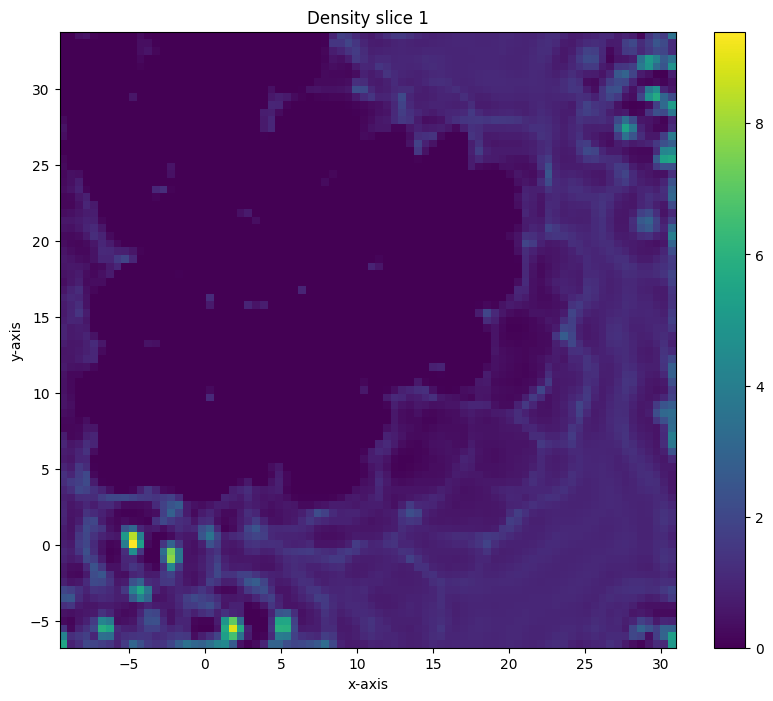

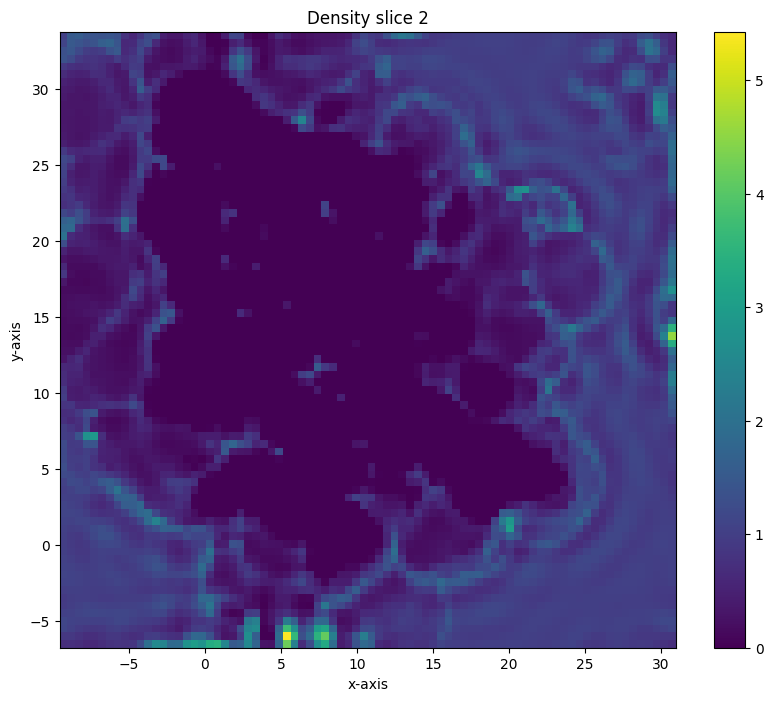

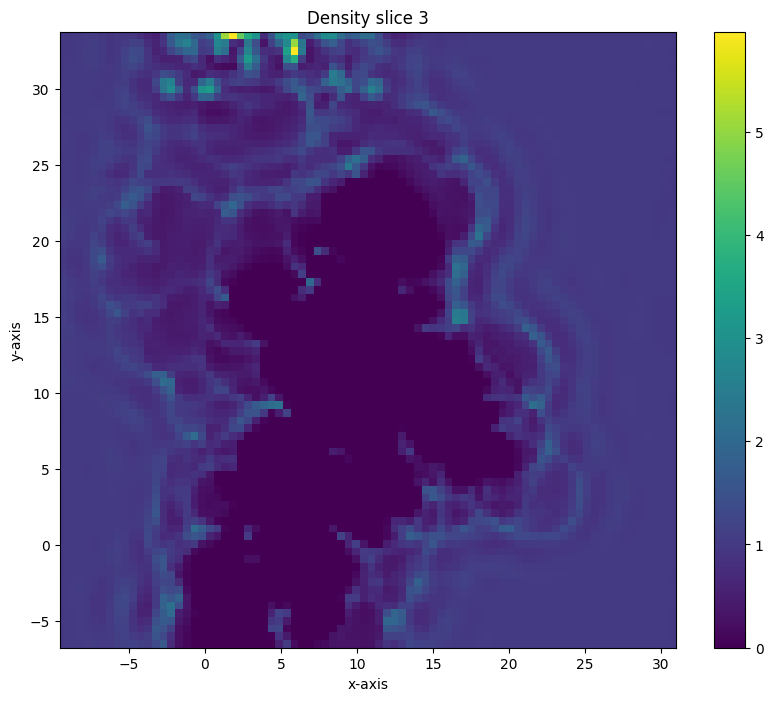

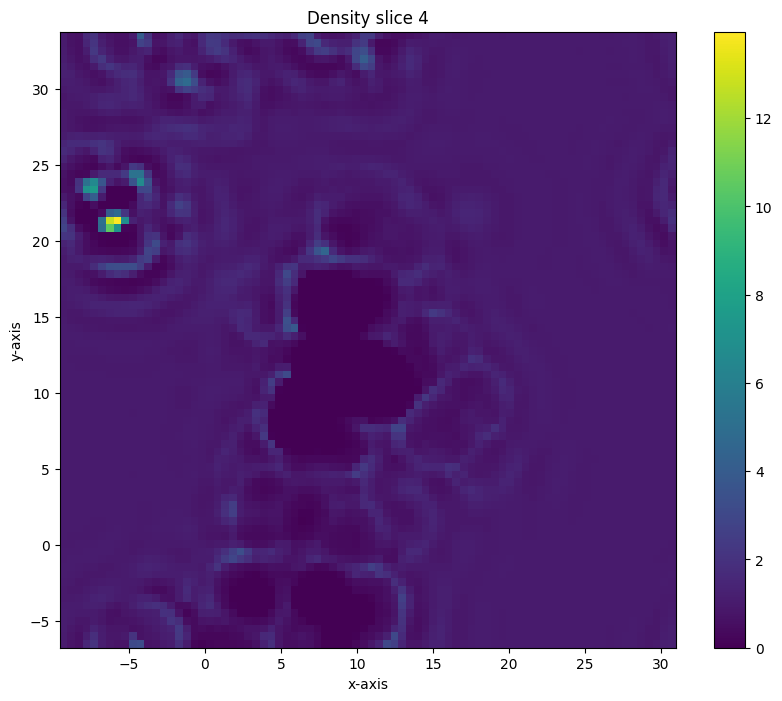

In [18]:
for c, canvas in enumerate(canvases_dh):
    canvas.draw(title=f"Density slice {c}")